In [2]:
import pandas as pd
from ast import literal_eval
import json
import numpy as np
import csv

In [3]:
dataset_df = pd.read_csv('data.csv',encoding="utf-8",converters={"tags":literal_eval})
dataset_df

,Unnamed: 0,name,steam_appid,release_date,is_free,required_age,rate,price,owners,tags
0,0,Dota 2,570,2013,True,0,0.829342,0,350000000,"[Free to Play, MOBA, Multiplayer, Strategy, e-..."
1,1,Counter-Strike: Global Offensive,730,2012,True,0,0.882848,0,75000000,"[FPS, Shooter, Multiplayer, Competitive, Actio..."
2,2,New World,1063730,2021,False,0,0.680567,3999,75000000,"[Massively Multiplayer, Open World, MMORPG, RP..."
3,3,Team Fortress 2,440,2007,True,0,0.936167,0,75000000,"[Free to Play, Hero Shooter, Multiplayer, FPS,..."
4,4,Apex Legends™,1172470,2020,True,0,0.858303,0,75000000,"[Free to Play, Multiplayer, Battle Royale, Sho..."
...,...,...,...,...,...,...,...,...,...,...
49541,49541,VEHICLES FURY,749290,2017,False,0,0.166667,1499,10000,"[Action, Indie, Racing]"
49542,49542,Crawler,1506770,2021,False,0,0.416667,399,10000,"[Adventure, Action RPG, Exploration, Dungeon C..."
49543,49543,Coins Collector Simulator,1868280,2022,False,0,0.625000,499,10000,"[Casual, Racing, Simulation, Sports, Strategy,..."
49544,49544,You Arrive in a Town,1466190,2021,False,0,0.473684,499,10000,"[Indie, Action, Casual, RPG, Action RPG, Arcad..."


In [4]:
'''
dictionary
key: year
val: dictionary mapping tag to number
'''
year_tag_dict = {}
for index, row in dataset_df.iterrows():
    year = row["release_date"]
    tags = row["tags"]
    if year in year_tag_dict:
        tag_count_dict = year_tag_dict[year]
        for tag in tags:
            if tag in tag_count_dict:
                tag_count_dict[tag] += 1
            else:
                tag_count_dict[tag] = 1
    else:
        year_tag_dict[year] = {}
        for tag in tags:
            year_tag_dict[year][tag] = 1

## Parse data for visualization 1, force directed graph of tags

In [5]:
tag_name = {}
for i,row in dataset_df.iterrows():
    tags = row["tags"]
    for tag in tags:
        if tag not in tag_name:
            tag_name[tag] = 1
        else:
            tag_name[tag] += 1

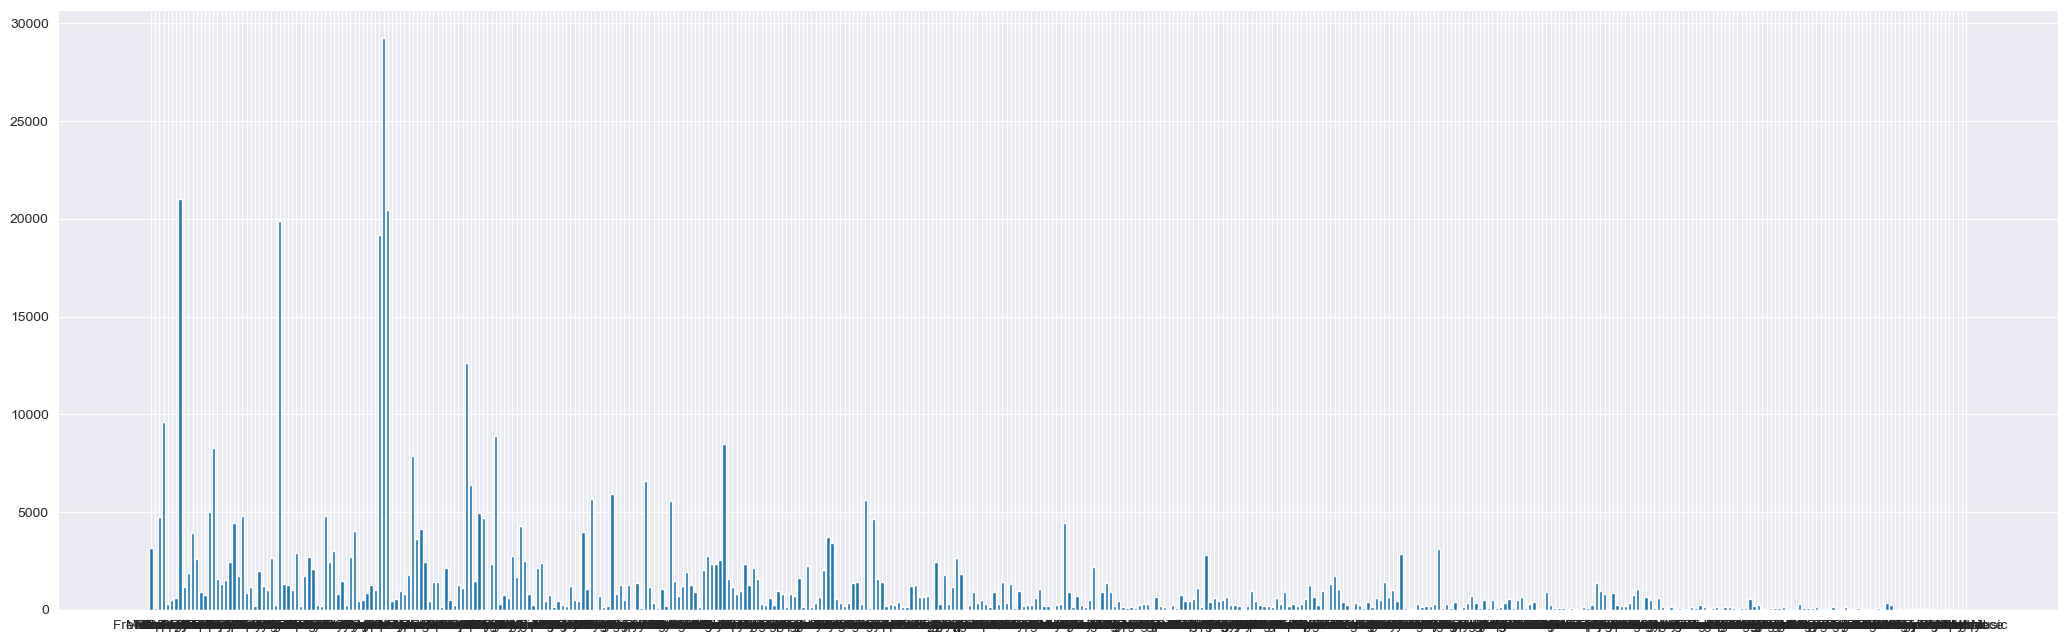

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
langs = tag_name.keys()
students = tag_name.values()
ax.bar(langs,students)
plt.show()

In [7]:
threshold = 2500
drop_num = 0
tag_use = []
for key in tag_name.keys():
    if tag_name[key] <= threshold:
        drop_num +=1
    else:
        tag_use.append(key)

In [8]:
print(drop_num)
print(len(tag_use))
print(tag_use)

390
48
['Free to Play', 'Multiplayer', 'Strategy', 'Action', 'Difficult', 'Co-op', 'Fantasy', 'RPG', 'Shooter', 'First-Person', 'Open World', 'Adventure', 'Third Person', 'Violent', 'Funny', 'Comedy', 'Survival', 'Sci-fi', 'Singleplayer', 'Indie', 'Casual', 'Atmospheric', 'Great Soundtrack', 'Horror', '2D', 'Pixel Graphics', 'Exploration', 'Platformer', 'Simulation', '2D Platformer', 'Family Friendly', 'Relaxing', '3D', 'Colorful', 'Story Rich', 'Cute', 'Point & Click', 'Mystery', 'Puzzle', 'Female Protagonist', 'Action-Adventure', 'Arcade', 'Retro', 'Stylized', 'Anime', 'Top-Down', 'Minimalist', 'Visual Novel']


In [9]:
length = len(tag_use)
matrix = [[0 for i in range(length)] for i in range(length)]
for i, row in dataset_df.iterrows():
    tags = row["tags"]
    for idx, tag in enumerate(tags):
        if tag in tag_use:
            for i in range(idx+1,len(tags)):
                if tags[i] in tag_use:
                    idx1 = tag_use.index(tag)
                    idx2 = tag_use.index(tags[i])
                    matrix[idx1][idx2] += 1

In [10]:
maxi = np.amax(matrix)
for i in range(length):
    for j in range(length):
        matrix[i][j] = matrix[i][j]/maxi * 50

In [11]:
'''
GOAL: json
{
    "nodes": [{"id": "tagname1", "group": 1}],
    "links": [{"source": "tagname1", "target": "tagname2", "value": co-occurance}]
}
'''
links = []
for i in range(length):
    for j in range(length):
        if i == j: continue
        if matrix[i][j] < 5:continue
        val = {"source":tag_use[i],"target":tag_use[j],"value":matrix[i][j]}
        links.append(val)

In [12]:
nodes = []
for i, tag in enumerate(tag_use):
    val = {"id": tag, "group": i+1}
    nodes.append(val)

In [13]:
vis1_dict = {"nodes":nodes,"links":links}
# Serializing json
json_object = json.dumps(vis1_dict, indent=4)
 
# Writing to sample.json
with open("visualization/vis1.json", "w") as outfile:
    outfile.write(json_object)

## Parse data for visualization 2, world cloud of tags

In [16]:

year = 2006
for i in range(16):
    word_count = 0
    year = year+1
    tag_list = list(year_tag_dict[year].keys())
    tag_count_list = []

    for i in tag_list:
        if year_tag_dict[year][i] < 30:
            tag_list.remove(i)

    for i in tag_list:
        tag_count_list.append(year_tag_dict[year][i])

    all_tag = sum(tag_count_list)

    for i in range(len(tag_count_list)):
        tag_count_list[i] = int(tag_count_list[i]*200/all_tag)

    file = open('./visualization/WordCloud_'+str(year)+'.txt', 'w')

    for i in range(len(tag_list)):
        tag_count = tag_count_list[i]
        for j in range(tag_count):
            word_count += 1
            file.write(tag_list[i] + ' ')
            
    print(year, word_count)

    file.close()


2007 159
2008 156
2009 150
2010 145
2011 149
2012 143
2013 134
2014 126
2015 120
2016 121
2017 117
2018 117
2019 112
2020 95
2021 98
2022 95


## Parse data for vis 4

In [ ]:
'''
header: year, tag1, tag2,...
'''
years = list(year_tag_dict.keys())
years.sort()

In [ ]:
import math
dataset_df["rate"].tolist()
for i in dataset_df["rate"].tolist():
    if math.isnan(i):
        print("nan found")

In [ ]:
for i in dataset_df["owners"].tolist():
    if math.isnan(i):
        print("nan found")

In [ ]:
rating = [[0 for i in range(len(tag_use))] for j in range(len(years))]
sum = [[0 for i in range(len(tag_use))] for j in range(len(years))]
for idx, row in dataset_df.iterrows():
    year = row["release_date"]
    tags = row["tags"]
    rate = row["rate"]
    if math.isnan(rate):
        continue
    sales = row["owners"]
    idx1 = years.index(year)
    for tag in tags:
        if tag in tag_use:
            idx2 = tag_use.index(tag)
            rating[idx1][idx2] += sales * rate
            sum[idx1][idx2] += sales

In [ ]:
for i in range(len(years)):
    for j in range(len(tag_use)):
        if sum[i][j] != 0:
            rating [i][j] = rating[i][j] / sum[i][j]

In [ ]:
for j in range(len(tag_use)):
    start = False
    for i in range(len(years)):
        if start:
            if rating[i][j] == 0:
                rating[i][j] = (rating[i-1][j] + rating[i+1][j])/2
        else:
            if rating[i][j] != 0:
                start = True

In [ ]:
rating

In [ ]:
with open("visualization/rate.csv", "w", newline="") as file:
    write = csv.writer(file)
    header = [["Year"] + tag_use]
    write.writerows(header)
    for i in range(len(years)):
        year = years[i]
        row = [year] + rating[i]
        write.writerows([row])

In [ ]:
with open("visualization/sales.csv", "w", newline="") as file:
    write = csv.writer(file)
    header = [["Year"] + tag_use]
    write.writerows(header)
    for i in range(len(years)):
        year = years[i]
        row = [year] + sum[i]
        write.writerows([row])

In [ ]:
with open("visualization/share.csv", "w", newline="") as file:
    write = csv.writer(file)
    header = [["Year"] + tag_use]
    write.writerows(header)
    for i in range(len(years)):
        year = years[i]
        val = np.array(sum[i],dtype=np.int64)
        val = val/val.sum()
        row = np.concatenate(([year],val))
        write.writerows([row])